# Dropout for Regularization

### Keras and Tensorflow

Tensorflow is used for higher order matrices.


Keras is used for building neural networks & its built on top of tensorflow. Behind the scenes keras is actually using tensorflow or u can say tensorflow is the backend. 

Other possible backend options could be Theano.

Building a CNN to classify pizza.

In [1]:
# Convolutional Neural Network (GOOD PIZZA  vs BURNT PIZZA)

# Building the CNN

#Importing Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.preprocessing import image


### Choosing size of Image to put in Architecture 

Usually all provided images will not be of same height and width. So if u can read a few images from directory and get an idea of what to put in initial height and width of images. e.g. if many images around $800 * 800$ & u put $150 * 150$ then images r going to shrink a lot.So its good idea to randomly check a few images.

If Image shrinked a lot while extracting features as part of ur convolutional stages u will end up extracting not clear form of those images.

You should try to put somewhere close to the average height and width. U can run for loop, take all shapes, take an avg of all height & avg of all width. So basically rather than randomly choosing u can start with some avg.

In [2]:
#loading data

image_width=150
image_height=150

train_data_dir=r'data/pizza_ds/Train'
test_data_dir=r'data/pizza_ds/Test'
validation_data_dir=r'data/pizza_ds/Val'

#train_sample=30
#validation_sample=25
#test_sample=50

#epochs=30
batch_size=12 # batch size for training
test_size=50  # batch size for test

The channel information comes at last if u r using Keras with Tensorflow but lets say u use Keras with some other backend like Theano, channels might be coming up first. e.g. image shape (224,224,3) here 3 r channels but with some other backend it may be (3,224,224).

In [3]:
K.image_data_format()

# On CPU m/c with Keras & Tf u will get channels_last.

'channels_last'

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape= (3,image_width,image_height)
else :
    input_shape= (image_width,image_height,3)

In [5]:
input_shape

(150, 150, 3)

When u have less number of data in images, u can create some augmented forms of images.

Traditionally (without augmentation) in training if u have n number of images, those same n images will be used in every epoch for training. However if you augment the dataset and set steps_per_epoch=train_genarator.samples//batch_size u r assured that all of training images in 1 epoch gets augmented, so every epoch has some variations of that original n images which introduces variation & variety in data & helps to avoid overfitting.

In [6]:
# Data Augmentation

train_datagen= ImageDataGenerator(rotation_range=40, #Rotate by 40 Degrees
                                  width_shift_range=0.2, #Shifts the width
                                  height_shift_range=0.2, #Shifts the height 
                                  shear_range=0.2, 
                                  zoom_range=0.2,
                                  rescale=1./255,
                                  horizontal_flip=True,
                                  fill_mode='nearest');

validation_datagen= ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

Now get iterators for your training, validation & test.

In [7]:
train_genarator= train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(image_width,image_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')


validation_genarator= validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size=(image_width,image_height),
                                                             batch_size=batch_size,
                                                             class_mode='binary')


test_genarator= test_datagen.flow_from_directory(test_data_dir,
                                                 target_size=(image_width,image_height),
                                                 batch_size=test_size,
                                                 class_mode='binary')


Found 566 images belonging to 2 classes.
Found 221 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [8]:
train_genarator.class_indices


{'Burnt': 0, 'Good': 1}

Class mode='Binary' since 2 classes Burnt and Good Pizza. And label assigned according to alphabelt since B in burnt pizza hence label 0 and G in Good hence label 1.

In [9]:
# Build model

# Initialising the CNN

model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape, activation='relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
# Adding a second convolutional layer
model.add(Conv2D(32,(3,3),input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Adding a third convolutional layer
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dropout(0.2))  # 20% neurons in this layer of 64 neurons turned off
model.add(Dense(64, activation='relu',))


model.add(Dense(1, activation='sigmoid'))

# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-09-30 06:35:15.380025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 activation (Activation)     (None, 34, 34, 64)        0

Every convolution, max-pooling keeps reducing the size of feature map. If u have $1000 * 1000$ image size, u might need to add more convolution layers as cz if during flatten u end up at say $500 * 500$, still the number of features is very high 250000. So u need to choose image size (depending on size of actual images in ur folder) as well as architecture a bit cautiously.

In [11]:
### Fitting the CNN to the images

print('starting training....')

model.fit(train_genarator,
          steps_per_epoch=train_genarator.samples//batch_size,
          epochs=10,
          validation_data=validation_genarator,
          validation_steps=validation_genarator.samples//batch_size)

starting training....
Epoch 1/10
47/47 [==============================] - 5s 101ms/step - loss: 0.6953 - accuracy: 0.5253 - val_loss: 0.6935 - val_accuracy: 0.5046
Epoch 2/10
47/47 [==============================] - 5s 97ms/step - loss: 0.6805 - accuracy: 0.5740 - val_loss: 0.5385 - val_accuracy: 0.7824
Epoch 3/10
47/47 [==============================] - 5s 96ms/step - loss: 0.6735 - accuracy: 0.5830 - val_loss: 0.5928 - val_accuracy: 0.6389
Epoch 4/10
47/47 [==============================] - 5s 97ms/step - loss: 0.6594 - accuracy: 0.6155 - val_loss: 0.6147 - val_accuracy: 0.7685
Epoch 5/10
47/47 [==============================] - 5s 96ms/step - loss: 0.5907 - accuracy: 0.6931 - val_loss: 0.5746 - val_accuracy: 0.7500
Epoch 6/10
47/47 [==============================] - 5s 97ms/step - loss: 0.5756 - accuracy: 0.7274 - val_loss: 0.6370 - val_accuracy: 0.6574
Epoch 7/10
47/47 [==============================] - 5s 96ms/step - loss: 0.5929 - accuracy: 0.7166 - val_loss: 0.6243 - val_accurac

In [12]:
print('training finished!!')

training finished!!


UDF (User Defined Function) to decide whether pizza is a burnt or good pizza.

In [13]:
def obtain_inference(img):
    im = image.img_to_array(img)
    img1 = im/255
    img1 = img1.reshape((1,150,150,3))
    prediction = model.predict(img1)
    if prediction > 0.5:
        print('Good Pizza')
    else:
        print('Burnt Pizza')

In [14]:
img1 = image.load_img(r'data/pizza_ds/Test/Good/good (35).jpg',target_size=(150,150))
obtain_inference(img1)

1/1 [==============================] - 0s 68ms/step
Good Pizza


In [15]:
img2 = image.load_img(r'data/pizza_ds/Test/Burnt/12.jpg',target_size=(150,150))
obtain_inference(img2)

1/1 [==============================] - 0s 16ms/step
Burnt Pizza


### About Drop outs

    - In every epoch, data is fed in batches to train the neural network. 
    
    - While a batch of data is fed into all the neurons in a layer, some neurons in that layer can be automatically turned off and the data does not pass through these neurons.
    
    - Drop outs are implemented at a layer level.
    
    - The No. of neurons to be turned off is specified as a percentage of the total neurons in a layer.
    
    - Suppose in a hidden layer there are 10 neurons and we implement a droput of 0.2, which means that 20% of the neurons (2 neurons) in that layer is randomly turned off while every batch of data is fed into the layer.
    
    - This helps in avoiding overfitting

*The number of neurons at some layer become so much, it will start overfitting the model, it will start understanding all noise which is present in r input. Hence some neurons r switched off randomly in the layer to avoid overfitting*

### Neural Network with one hidden layer
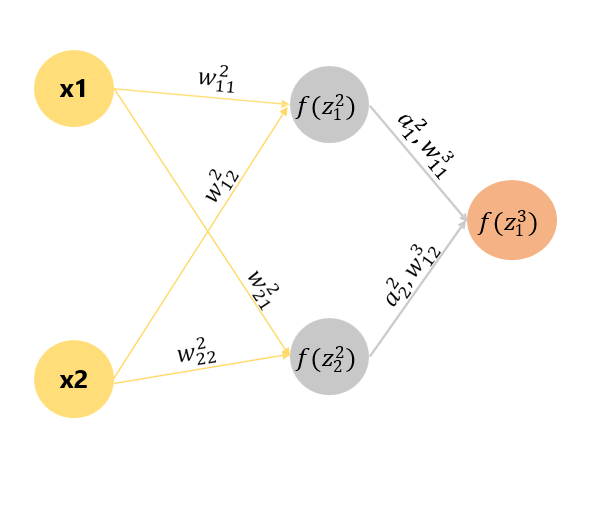

### While one batch  of data is fed one of the neurons is automatically turned off
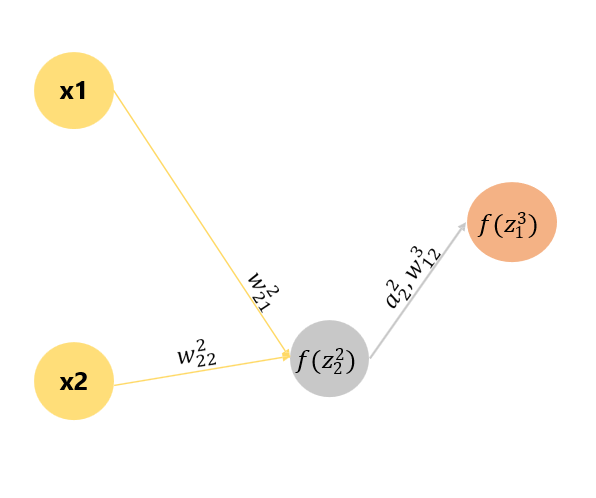

### When another batch of data is fed one of the neurons is automatically turned off
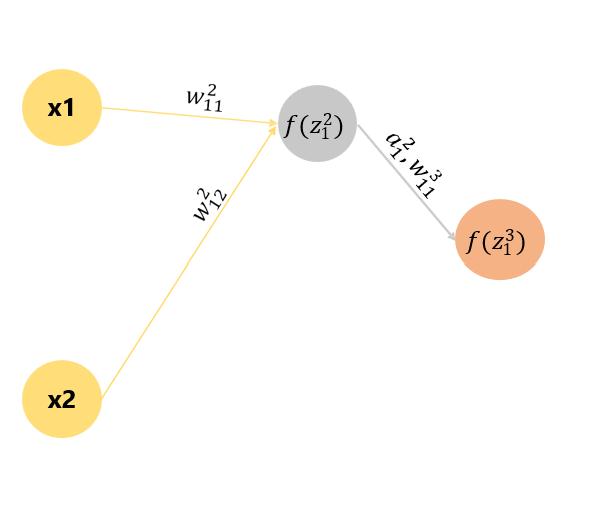

    - This is to ensure that No Neuron in a layer of a neural network can introduce any sort of bias.

    - If there are multiple hidden layers, drop outs can be applied to every layer. It can be applied to convolution layer or fully connected layers.
    
    - Drop outs can be applied to any layer except the output layer. In last layer u will have v.few neurons & no point in turning it off. 
    
    - The assumption is in all layers prior to o/p layer, num of neurons will be v.high & u can opt to turn off randomly some of them.
    
    - We have initially added neurons to increase complexity of model. Too many neurons in a particular layer might result in overfitting while training model we can randomly keep turning it off.

To improve accuracy of model-

- try to increase epochs
- play with architecture layers, kernels etc
- Usually with CNN we dont have too many fully connected layers, its going to be 1 max another one
- Data Augmentation, droput, batch normalization to avoid overfitting.
- Use pre-trained models.